In [2]:
# ------------------------
# 1. Cargar datos
# ------------------------
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../Transform/pib_servicios.csv')

# Verificamos las columnas disponibles
print(df.columns)
df.tail()

Index(['Valor_actual', 'Valor_anterior', 'Mayor', 'Menor', 'Fechas', 'Unidad',
       'Frecuencia', 'Referencia', 'fecha'],
      dtype='object')


,Valor_actual,Valor_anterior,Mayor,Menor,Fechas,Unidad,Frecuencia,Referencia,fecha
0,17133.0,16153.0,17133.0,7351.0,2007 - 2024,Pen Millones,Trimestral,Dec 2024,17-05-2025


In [3]:
# Asegurarnos de que los datos sean numéricos
for col in ['Valor_actual', 'Valor_anterior', 'Mayor', 'Menor']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Ordenar por fecha de referencia si es necesario
# Asumimos que "Referencia" representa una fecha tipo 'Dec 2024'
# Creamos columna ordenable:
df['Referencia_dt'] = pd.to_datetime(df['Referencia'], format='%b %Y', errors='coerce')
df = df.sort_values('Referencia_dt')

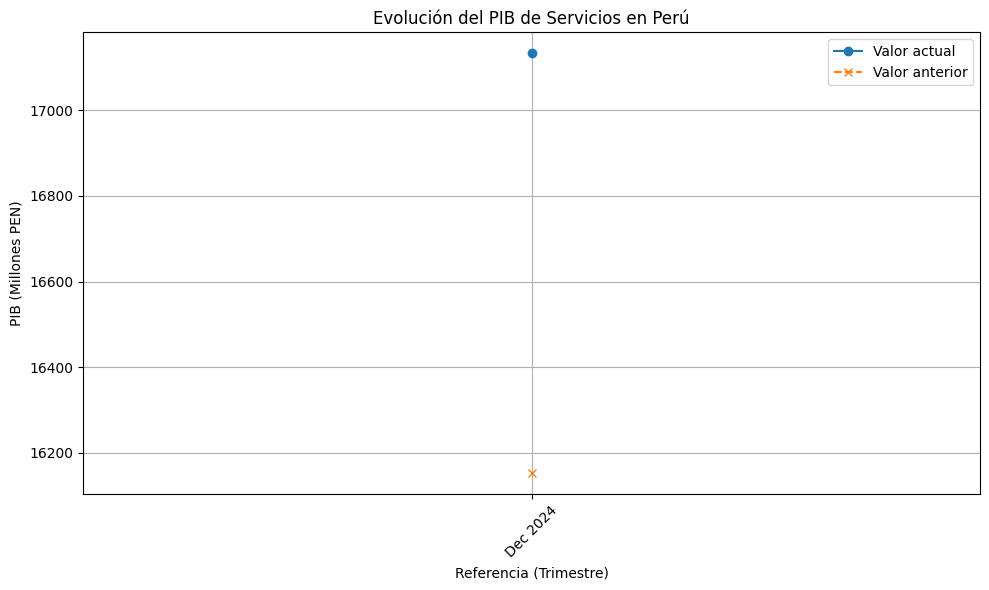

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(df['Referencia'], df['Valor_actual'], marker='o', label='Valor actual')
plt.plot(df['Referencia'], df['Valor_anterior'], marker='x', linestyle='--', label='Valor anterior')

plt.title('Evolución del PIB de Servicios en Perú')
plt.xlabel('Referencia (Trimestre)')
plt.ylabel('PIB (Millones PEN)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

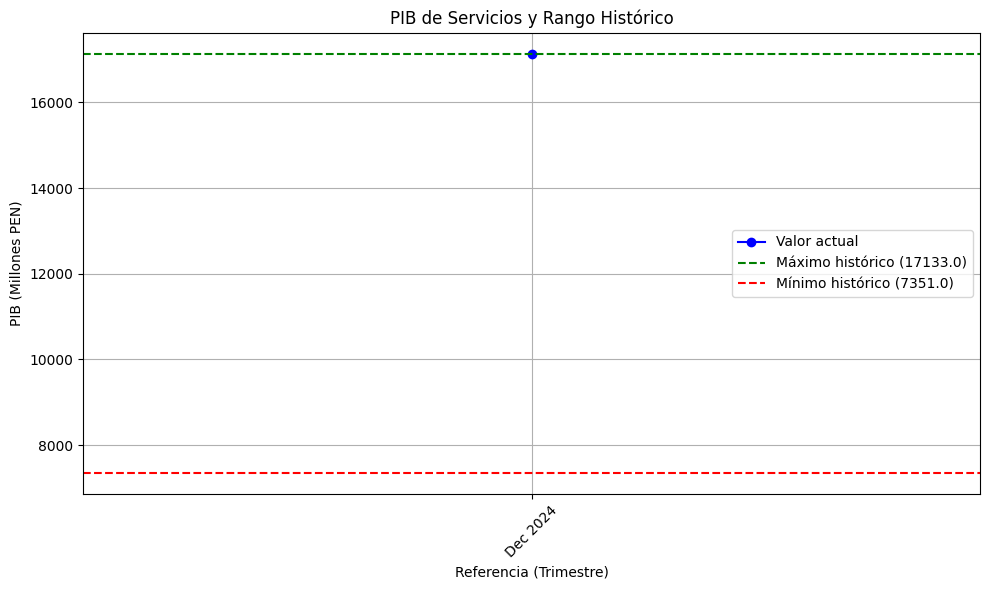

In [8]:
# Extraer datos necesarios
x = df['Referencia']
y_actual = df['Valor_actual']

# Obtener el máximo y mínimo global
maximo = df['Mayor'].max()
minimo = df['Menor'].min()

# Crear gráfico
plt.figure(figsize=(10, 6))

plt.plot(x, y_actual, marker='o', label='Valor actual', color='blue')
plt.axhline(maximo, color='green', linestyle='--', label=f'Máximo histórico ({maximo})')
plt.axhline(minimo, color='red', linestyle='--', label=f'Mínimo histórico ({minimo})')

plt.title('PIB de Servicios y Rango Histórico')
plt.xlabel('Referencia (Trimestre)')
plt.ylabel('PIB (Millones PEN)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()